In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/Lukas/Desktop/commaai-speed-challenge/data/test.txt"
def getLabels():
    labels = []
    f = open(path,'r')
    for l in f:
        labels.append(float(l))
    labels = np.array(labels)
    return labels

In [3]:
labels = getLabels()

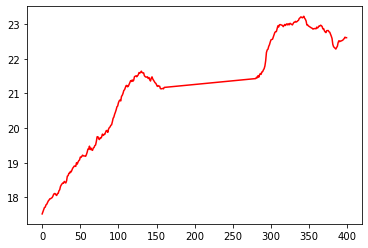

In [143]:
start = (2,0)
end = (2,20)
s_frame_nr = int(start[1]*20+start[0]*20*60)
e_frame_nr = int(end[1]*20+end[0]*20*60)


plt.plot(labels[s_frame_nr:e_frame_nr],'r-')
plt.show()

In [114]:
#set Zero
for i in range(s_frame_nr, e_frame_nr):
    labels[i] = 0;

In [138]:
#set Linear

length = e_frame_nr - s_frame_nr
diff = labels[e_frame_nr] - labels[s_frame_nr]
s_val = labels[s_frame_nr]
for i in range(0, int(length)):
    labels[i+s_frame_nr] = s_val + i * (diff/length)

In [108]:
#reduce

for i in range(s_frame_nr, e_frame_nr):
    labels[i] = labels[i]/2;

In [140]:
labels_mean = rollingMean(labels)

In [141]:
for i,v in enumerate(labels_mean):
    if v<0.3:
        labels_mean[i] = 0

In [144]:
with open(path, "w") as f:
    for speed in labels_mean:
        f.write(str(speed)+"\n")

In [119]:
def rollingMean(mylist):
    ROLLING_MEAN = 31
    avrg = []

    first = 0
    for i in range(ROLLING_MEAN):
        first += (mylist[max(i-ROLLING_MEAN//2, 0)] / ROLLING_MEAN)
    avrg.append(first)
    
    for i in range(1, len(mylist)):
        last = avrg[i-1] * ROLLING_MEAN
        past = mylist[max(i-1-ROLLING_MEAN//2, 0)]
        new =  mylist[min(i+ROLLING_MEAN//2, len(mylist)-1)]
        avrg.append((last - past + new)/ROLLING_MEAN)
    return avrg